In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
# y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)

(7000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [5]:
def cross_validation(x_train, k=5):
    ans = []
    index = np.arange(x_train.shape[0])
    np.random.shuffle(index)
    
    index_split = np.array_split(index, k) # split the index
    #print(index_split)
    for subindex in index_split:
        element = []
        tmp = []
        element.append(tmp)
        
        for i in index:
            if (i not in subindex):
                element[0].append(i)
        element.append(subindex)
        #print(subindex)
        ans.append(element)
    return ans
    

In [6]:
kfold_data = cross_validation(x_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
#print(kfold_data[0][1])
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

## example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  3  4  6  7  8  9 10 11 13 14 16 17 18 19], Validation index: [ 2  5 12 15]
Split: 2, Training index: [ 0  1  2  3  5  7  8  9 10 11 12 13 14 15 17 19], Validation index: [ 4  6 16 18]
Split: 3, Training index: [ 0  1  2  3  4  5  6  7  9 11 12 14 15 16 18 19], Validation index: [ 8 10 13 17]
Split: 4, Training index: [ 2  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19], Validation index: [ 0  1  3 14]
Split: 5, Training index: [ 0  1  2  3  4  5  6  8 10 12 13 14 15 16 17 18], Validation index: [ 7  9 11 19]


In [8]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [9]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.01)

In [10]:
# trace all the possibilities
kfold_dataset = cross_validation(x_train, k=5)
r = [0.000001, 0.00001, 0.00005, 0.0001, 0.0005, 0.001]
c = [0.1, 0.5, 1, 5, 10, 50, 100, 1000, 10000]
record = np.zeros([len(c), len(r)])
for i in range(len(r)):
    for j in range(len(c)):
        clf = SVC(C=c[j], kernel='rbf', gamma=r[i])
        score = 0
        for k in range(len(kfold_dataset)):
            clf.fit(x_train[kfold_dataset[k][0]], y_train[kfold_dataset[k][0]])
            y_pred = clf.predict(x_train[kfold_dataset[k][1]]) 
            score  = score + accuracy_score(y_train[kfold_dataset[k][1]], y_pred)
        score = score / len(kfold_dataset)
        record[j][i] = score
print(record)


[[0.49142857 0.91385714 0.96314286 0.97485714 0.49142857 0.49142857]
 [0.89242857 0.94442857 0.98914286 0.993      0.49142857 0.49142857]
 [0.90742857 0.95342857 0.99228571 0.99342857 0.74028571 0.49142857]
 [0.93028571 0.97585714 0.99314286 0.99357143 0.76842857 0.49142857]
 [0.93457143 0.985      0.993      0.99357143 0.76842857 0.49142857]
 [0.94214286 0.99085714 0.993      0.99357143 0.76842857 0.49142857]
 [0.94657143 0.99114286 0.993      0.99357143 0.76842857 0.49142857]
 [0.97528571 0.99114286 0.993      0.99357143 0.76842857 0.49142857]
 [0.98785714 0.99114286 0.993      0.99357143 0.76842857 0.49142857]]


In [11]:
max_index = np.where(record==np.max(record))
print(max_index)
print("Best r =",r[max_index[1][0]])
print("Best c =",c[max_index[0][0]])

(array([3, 4, 5, 6, 7, 8], dtype=int64), array([3, 3, 3, 3, 3, 3], dtype=int64))
Best r = 0.0001
Best c = 5


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

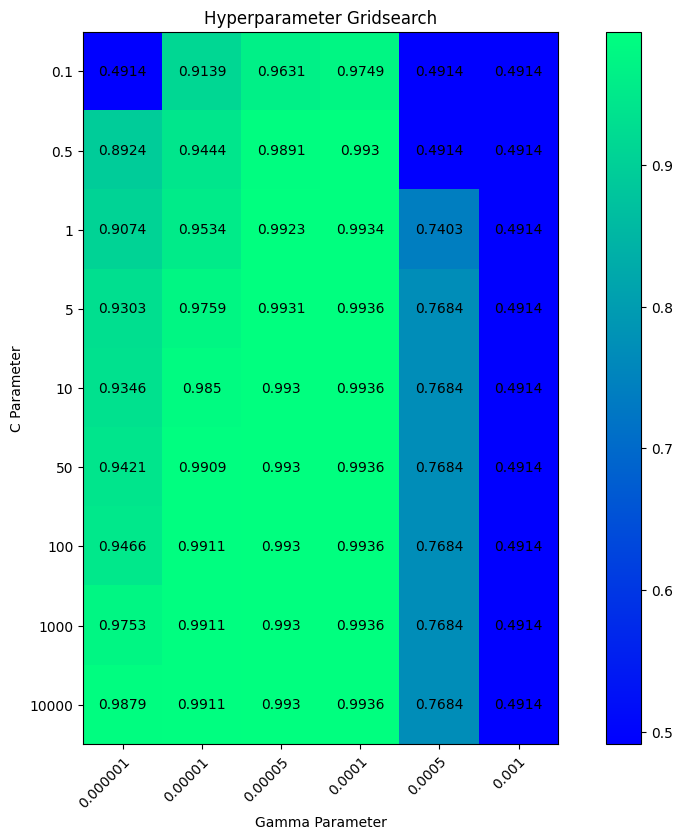

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

r = ["0.000001", "0.00001", "0.00005", "0.0001", "0.0005", "0.001"]
c = ["0.1", "0.5", "1", "5", "10", "50", "100", "1000", "10000"]
record_around = np.around(record, decimals=4)
fig, ax = plt.subplots()
im = ax.imshow(record_around, cmap="winter")
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(r)), labels=r)
ax.set_yticks(np.arange(len(c)), labels=c)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(r)):
    for j in range(len(c)):
        text = ax.text(i, j, record_around[j, i], ha="center", va="center")

ax.set_title("Hyperparameter Gridsearch")
plt.xlabel("Gamma Parameter")
plt.ylabel("C Parameter")
fig.tight_layout()
fig.set_size_inches(10, 10)
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [13]:
best_model = SVC(C=1, kernel='rbf', gamma=0.0001)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
#print("Accuracy score: ", accuracy_score(y_pred, y_test))